## Simulating 20 neurons

In [1]:
import sys
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from torch_geometric.utils import to_networkx

sys.path.append("..")
from spiking_network.models import SpikingModel
from spiking_network.utils import simulate
from spiking_network.datasets import W0Dataset, GlorotParams
from spiking_network.utils import sparse_to_dense
from spiking_network.plotting import visualize_spikes, visualize_weights, visualize_time_dependence

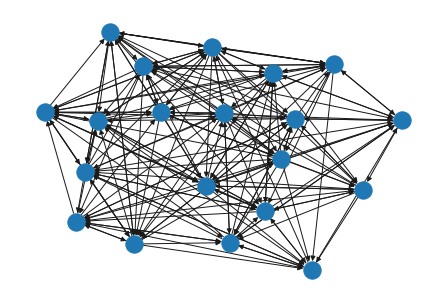

In [2]:
n_neurons = 20
n_datasets = 1
n_steps = 10000

# Create a dataset
dataset = W0Dataset(n_neurons, n_datasets, GlorotParams(0, 5), seeds=[0])

# Visualize a w0 matrix as a graph
w0 = dataset[0]
G = to_networkx(w0, remove_self_loops=True)
nx.draw(G)

In [3]:
# Create a model
model = SpikingModel()

# Simulate the model
X = simulate(model, w0, n_steps)

100%|██████████| 10000/10000 [00:01<00:00, 8202.69it/s]


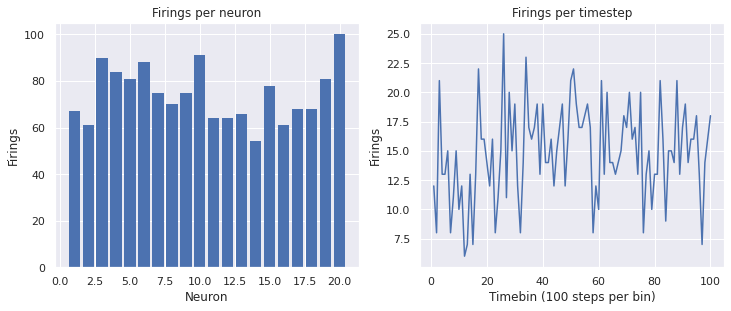

In [4]:
# Visualize the spikes
visualize_spikes(X)

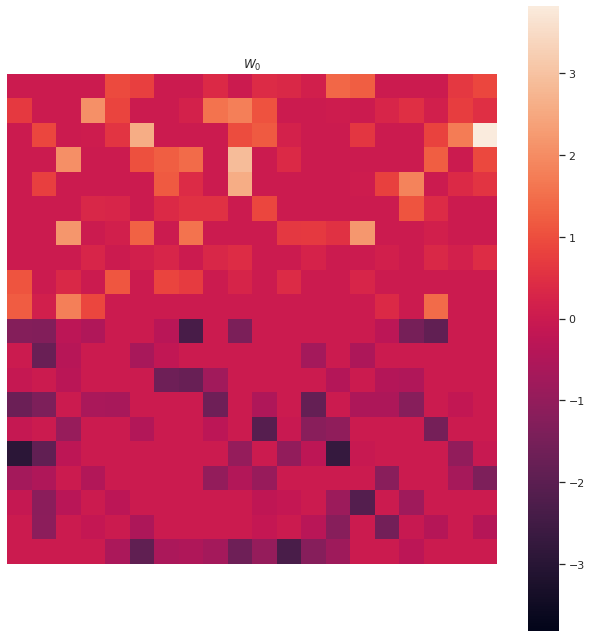

In [5]:
# Visualize the weights
W = sparse_to_dense(model.connectivity_filter(w0.W0, w0.edge_index), w0.edge_index)
visualize_weights(W[:, :, 0])

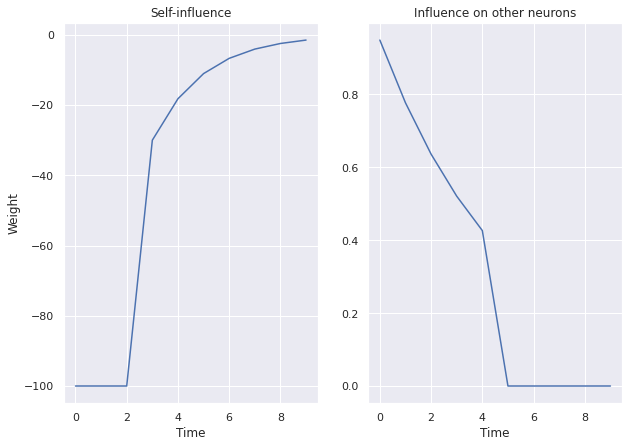

In [6]:
# Visualize the normalized time dependence of the weights
visualize_time_dependence(W)